In [69]:
import pandas as pd

In [70]:
diabetes = pd.read_csv('D:/SAME/Faradars/Python/04-Udemy - complete guide to tensorflow for deep learning with python/TensorFlow Bootcamp/02-TensorFlow-Basics/pima-indians-diabetes.csv')

In [71]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [72]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [73]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [74]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [75]:
import tensorflow as tf

In [76]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [77]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [78]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [79]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

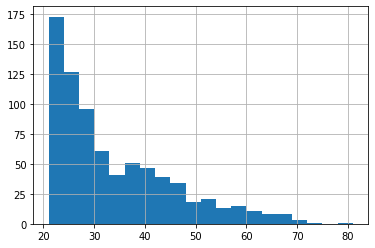

In [81]:
diabetes['Age'].hist(bins=20)

In [82]:
age_buckets = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [83]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,
            assigned_group, age_buckets]

In [84]:
x_data = diabetes.drop('Class',axis=1)

In [85]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [86]:
labels = diabetes['Class']

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size = 33, random_state = 101)

In [89]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                y = y_train,
                                                batch_size=10,
                                                num_epochs=1000,
                                                shuffle=True)

In [90]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,
                                     n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\feres\\AppData\\Local\\Temp\\tmp1di89xdb', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001B4425629E8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [91]:
model.train(input_fn=input_func,steps = 1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\feres\AppData\Local\Temp\tmp1di89xdb\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 165.187
INFO:tensorflow:loss = 5.427384, step = 101 (0.606 sec)
INFO:tensorflow:global_step/sec: 430.332
INFO:tensorflow:loss = 4.7103715, step = 201 (0.232 sec)
INFO:tensorflow:global_step/sec: 434.058
INFO:tensorflow:loss = 7.1136384, step = 301 (0.232 sec)
INFO:tensorflow:global_step/sec: 432.186
INFO:tensorflow:loss = 5.646704, step = 401 (0.231 sec)
INFO:tensorflow:global_step/sec: 424.862
INFO:tensorflow:loss = 5.6289835, step = 501 (0.233 s

In [92]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],
                                      feature_columns=feat_cols,
                                      n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\feres\\AppData\\Local\\Temp\\tmpq3n5u5fn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001B43E622C50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [93]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,
                                                       dimension=4)

In [94]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,
            embedded_group_col, age_bucket]

In [95]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,
                                                y_train,
                                                batch_size=10,
                                                num_epochs=1000,
                                                shuffle=True)

In [96]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],
                                      feature_columns=feat_cols,
                                      n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\feres\\AppData\\Local\\Temp\\tmpdjs0wjoj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001B43E62C208>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [97]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\feres\AppData\Local\Temp\tmpdjs0wjoj\model.ckpt.
INFO:tensorflow:loss = 7.087053, step = 1
INFO:tensorflow:global_step/sec: 173.773
INFO:tensorflow:loss = 5.8099947, step = 101 (0.578 sec)
INFO:tensorflow:global_step/sec: 426.673
INFO:tensorflow:loss = 5.7849455, step = 201 (0.232 sec)
INFO:tensorflow:global_step/sec: 312.351
INFO:tensorflow:loss = 5.2094936, step = 301 (0.321 sec)
INFO:tensorflow:global_step/sec: 317.31
INFO:tensorflow:loss = 4.6776085, step = 401 (0.314 sec)
INFO:tensorflow:global_step/sec: 407.591
INFO:tensorflow:loss = 3.7919993, step = 501 (0.246 sec)
INFO:tenso

In [98]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                     y=y_test,
                                                     batch_size=10,
                                                     num_epochs=1,
                                                     shuffle=False)

In [100]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-02T16:08:07Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\feres\AppData\Local\Temp\tmpdjs0wjoj\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-02-16:08:08
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72727275, accuracy_baseline = 0.57575756, auc = 0.77255625, auc_precision_recall = 0.6481395, average_loss = 0.57980895, global_step = 1000, label/mean = 0.42424244, loss = 4.783424, precision = 0.7777778, prediction/mean = 0.39232913, recall = 0.5
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\feres\AppData\Local\Temp\tm

{'accuracy': 0.72727275,
 'accuracy_baseline': 0.57575756,
 'auc': 0.77255625,
 'auc_precision_recall': 0.6481395,
 'average_loss': 0.57980895,
 'label/mean': 0.42424244,
 'loss': 4.783424,
 'precision': 0.7777778,
 'prediction/mean': 0.39232913,
 'recall': 0.5,
 'global_step': 1000}